# #01 Importing libraries

In [66]:
# Importing libraries with 3 new libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# #02 Importing data

In [68]:
# Defining a path for importing/exporting
path = r'/Users/peterguan/Citi Bike Analysis'

In [69]:
# Importing data from CSV format
bike = pd.read_csv(r'/Users/peterguan/Citi Bike Analysis/02 Data/Original Data/citibike.csv', index_col = False)

In [70]:
# Double checking if all the rows and columns imported successfully
bike

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Fb2bmC,17988,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,478,11 Ave & W 41 St,40.760301,-73.998842,2697,Non-Subscriber,NaN,0
49996,XGB7JU,18458,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970.0,2
49997,vFs2HS,15054,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961.0,2
49998,xxacSt,16763,Sat,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2697,Non-Subscriber,NaN,0


# #03 Data Cleaning

### Checking for DUPLICATES

In [73]:
# Checking for duplicates
bike_duplicates = bike[bike.duplicated]

In [74]:
# Checking for duplicates (NONE)
bike_duplicates

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender


### Checking for MISSING VALUES

In [76]:
# Checking for missing values
bike.isnull().sum()

trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                 6979
gender                        0
dtype: int64

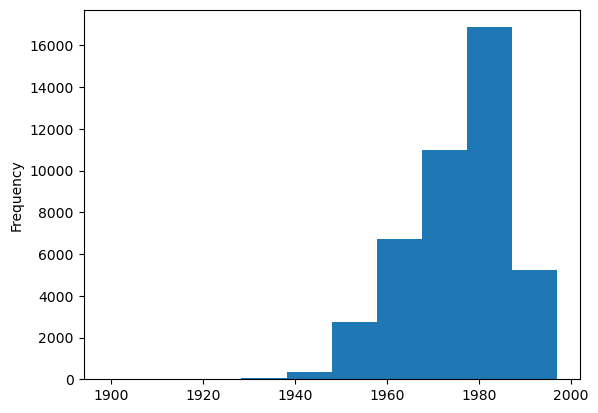

In [77]:
# Creating a HISTOGRAM to check the distribution of data of the 'birth_year' column
hist_birth_year = bike['birth_year'].plot.hist(bins = 10)

In [78]:
# Checking the DESCRIPTIVE STATISTICS for the MEDIAN of the 'birth_year' column
bike.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,43021.000000,50000.000000
mean,17615.269360,14.145240,443.321500,40.734170,-73.991109,442.539700,40.733859,-73.991351,838.982900,1975.627786,1.073540
std,1675.407446,4.860541,356.559925,0.019911,0.012555,355.756022,0.019885,0.012569,573.663997,11.089001,0.589389
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1899.000000,0.000000
25%,16188.000000,10.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,417.000000,1968.000000,1.000000
50%,17584.000000,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.991218,672.000000,1978.000000,1.000000
75%,19014.000000,18.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1112.000000,1984.000000,1.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,2.000000


In [79]:
# Replacing all the 'NA' values in the 'birth_year' column with the MEDIAN
bike['birth_year'].fillna(1978, inplace=True)

In [80]:
# Checking if the replacement worked
bike.isnull().sum()

trip_id                    0
bike_id                    0
weekday                    0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
dtype: int64

### Checking for OUTLIERS

In [82]:
# Creating a subset that displays the rows where the column 'birth_year' has a value < 1923
bike_outliers = bike.loc[bike['birth_year'] < 1923]

In [83]:
# Checking if the subset was created correctly
bike_outliers

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
306,dSYFPK,15004,Fri,22,2013-09-06 22:27:51,473,Rivington St & Chrystie St,40.721101,-73.991925,2013-09-06 22:29:33,473,Rivington St & Chrystie St,40.721101,-73.991925,102,Subscriber,1922.0,1
563,wkmOxr,19507,Mon,12,2013-09-23 12:43:58,305,E 58 St & 3 Ave,40.760958,-73.967245,2013-09-23 12:52:50,2006,Central Park S & 6 Ave,40.765909,-73.976342,532,Subscriber,1900.0,1
1371,M2EaCC,16277,Thu,11,2013-09-05 11:20:55,500,Broadway & W 51 St,40.762288,-73.983362,2013-09-05 11:36:10,497,E 17 St & Broadway,40.737050,-73.990093,915,Subscriber,1900.0,1
1431,j2Vg6q,14638,Thu,7,2013-09-26 07:35:18,427,State St,40.702515,-74.014270,2013-09-26 08:00:02,212,W 16 St & The High Line,40.743349,-74.006818,1484,Subscriber,1901.0,1
1754,BQLrTb,17594,Wed,17,2013-09-25 17:00:04,476,E 31 St & 3 Ave,40.743943,-73.979661,2013-09-25 17:09:33,435,W 21 St & 6 Ave,40.741740,-73.994156,569,Subscriber,1900.0,1
3548,ij2ZaZ,14835,Thu,17,2013-09-19 17:52:57,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-19 18:03:24,168,W 18 St & 6 Ave,40.739713,-73.994564,627,Subscriber,1922.0,1
4823,S6IfuK,19804,Thu,7,2013-09-12 07:36:39,515,W 43 St & 10 Ave,40.760094,-73.994618,2013-09-12 07:55:02,268,Howard St & Centre St,40.719105,-73.999733,1103,Subscriber,1899.0,1
7502,qawZh0,17490,Mon,7,2013-09-30 07:38:46,498,Broadway & W 32 St,40.748549,-73.988084,2013-09-30 08:01:17,340,Madison St & Clinton St,40.712690,-73.987763,1351,Subscriber,1900.0,1
9644,wBkIk3,15732,Sun,11,2013-09-08 11:11:35,515,W 43 St & 10 Ave,40.760094,-73.994618,2013-09-08 11:32:02,268,Howard St & Centre St,40.719105,-73.999733,1227,Subscriber,1899.0,1
12926,xokid3,14944,Fri,20,2013-09-20 20:16:18,427,State St,40.702515,-74.014270,2013-09-20 20:58:45,259,South St & Whitehall St,40.701221,-74.012342,2547,Subscriber,1899.0,1


In [84]:
# Drop rows where 'birth_year' is less than 1923, in place
bike.drop(bike[bike['birth_year'] < 1923].index, inplace=True)

In [85]:
# Checking if the rows were successfully dropped
bike.shape

(49972, 18)

### Checking for DATA CONSISTENCY

In [87]:
# Checking the 'gender' column before replacing the values
bike.gender

0        2
1        1
2        1
3        2
4        0
        ..
49995    0
49996    2
49997    2
49998    0
49999    2
Name: gender, Length: 49972, dtype: int64

In [88]:
# Checking the 'gender' column before replacing the values
bike['gender'].value_counts()

gender
1    32333
2    10658
0     6981
Name: count, dtype: int64

In [89]:
# Replacing the values in the 'gender' column from (0, 1, 2) to (Unknown, Male, Female)
bike['gender'] = bike['gender'].replace(0, 'Unknown')
bike['gender'] = bike['gender'].replace(1, 'Male')
bike['gender'] = bike['gender'].replace(2, 'Female')

In [90]:
# Double checking if the REPLACEMENT was successful
bike['gender'].value_counts()

gender
Male       32333
Female     10658
Unknown     6981
Name: count, dtype: int64

In [91]:
# Creating a new column named 'Age'
current_year = 2013

bike['age'] = current_year - bike['birth_year']

In [92]:
# Checking if the column was created successfully
bike.head(5)

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,45.0
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,30.0
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,24.0
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,25.0
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978.0,Unknown,35.0


In [93]:
# Checking each columns datatype
bike.dtypes

trip_id                     object
bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender                      object
age                        float64
dtype: object

In [94]:
# Changing the datatype of the 'birth_year' and 'age' column from float64 to int64 to remove the decimal places
bike[['birth_year', 'age']] = bike[['birth_year', 'age']].astype('int')

In [95]:
# Checking if the datatypes changed
bike.dtypes

trip_id                     object
bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                   int64
gender                      object
age                          int64
dtype: object

In [96]:
# Checking if the 'birth_year' and 'age' columns was updated successfully
bike.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,45
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,30
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,24
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,25
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown,35


# #04 Descriptive Statistics

In [98]:
# Checking the descriptive statistics for the bike dataset
bike.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,age
count,49972.00000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000
mean,17615.30313,14.145922,443.306792,40.734170,-73.991106,442.526035,40.733860,-73.991348,838.916873,1975.999240,37.000760
std,1675.10716,4.860677,356.582817,0.019911,0.012553,355.701958,0.019885,0.012569,573.687019,10.178138,10.178138
min,14556.00000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1924.000000,16.000000
25%,16188.00000,10.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,417.000000,1970.000000,30.000000
50%,17584.00000,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.990985,672.000000,1978.000000,35.000000
75%,19014.00000,18.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1112.000000,1983.000000,43.000000
max,20642.00000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,89.000000


# #05 Exporting the dataset

In [100]:
bike.to_csv(os.path.join(path, '02 Data','Prepared Data', 'bike.csv'))